# Images: Resolution of the median filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import sys
from scipy.signal import medfilt
# Add a new path with needed .py files.
sys.path.insert(0, 'C:\Users\Dowa\Desktop\Hiwi\kt-2015-DSPHandsOn\MedianFilter\Python') 

import functions
import gitInformation

In [2]:
% matplotlib inline

In [3]:
gitInformation.printInformation()

Information about this notebook
Date: 2016-06-21
Python Version: 2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Git directory: C:\Users\Dowa\Desktop\Hiwi\kt-2015-DSPHandsOn\.git
Current git SHA: a3d5d42f90ee9ecb2b3d257d260305294c7a793d
Remotes: origin, 
Current branch: master
origin remote URL: https://github.com/dowa4213/kt-2015-DSPHandsOn.git


In [4]:
samples = 16*128
waveNumber = 16
time = np.linspace(0, 2, samples)
data = np.sin(np.pi*time*waveNumber)

In [5]:
from pylab import *
def parameters():
    params = {
   'axes.labelsize': 14,
   'text.fontsize': 8,
   'legend.fontsize': 15,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [10, 5]
   }
    rcParams.update(params)
    ax = plt.subplot()
    xticks = np.arange(0, len(data)+1, samples/waveNumber)
    ax.set_xticks(xticks)
    x_label = [r"${%s\pi}$" % (2*w) for w in range(0, len(xticks))]
    ax.set_xticklabels(x_label)

C:\Anaconda\lib\site-packages\matplotlib\__init__.py:855: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


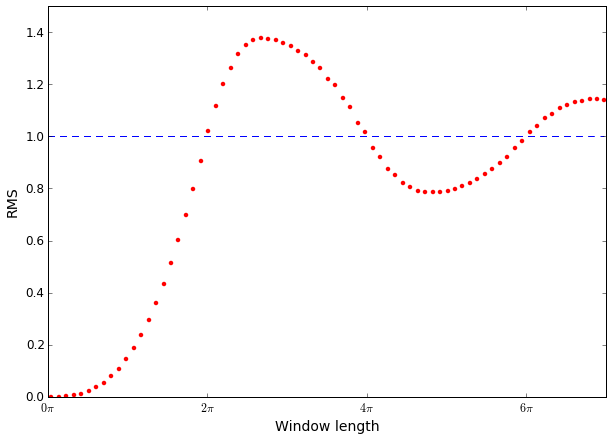

In [6]:
plt.figure(figsize=(10,7))
parameters()
plt.xlabel("Window length")
plt.ylabel("RMS")
for y in range (0, 150):
    if y % 2 == 1:
        functions.ErrorPlotWindow(16, y*3, 16*128)
plt.savefig('Basic behavior.jpg',dpi=600, format = "jpg")

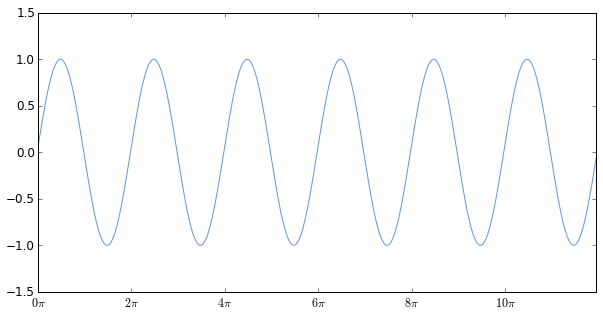

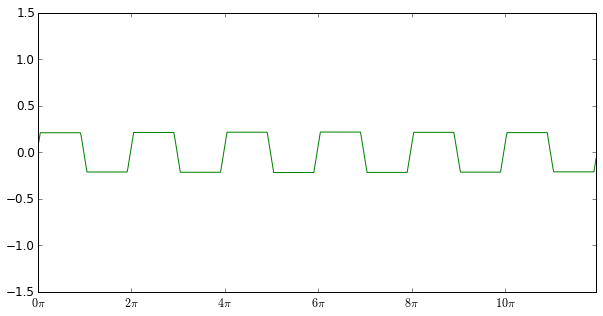

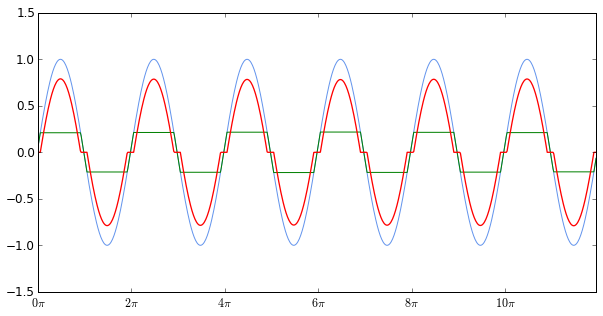

In [8]:
samples = 16*128
waveNumber = 16
time = np.linspace(0, 2, samples)
data = np.sin(np.pi*time*waveNumber)
data = data[128*5+1: -128*5-1]
data_filtered = medfilt(data,111)


plt.figure(1)
parameters()

plt.plot(data, color = "cornflowerblue")
axes = plt.gca()
axes.set_ylim([-1.5,1.5])
plt.savefig('1.jpg', dpi = 600, format = 'jpeg')

plt.figure(2)
parameters()
axes = plt.gca()
axes.set_ylim([-1.5,1.5])
plt.plot(data_filtered, color = 'g')
plt.savefig('2.jpg', dpi = 600, format = 'jpeg')



plt.figure(3)
parameters()
axes = plt.gca()
axes.set_ylim([-1.5,1.5])
plt.plot(data, color = "cornflowerblue")
plt.plot(data_filtered, color = 'g')
plt.plot(data-data_filtered, color = 'r', lw = 1.3)
plt.savefig('3.jpg', dpi = 600, format = 'jpeg')

As you can see, the resolution gets higher with a higher window length until the window legth is multiple of the sample rate.

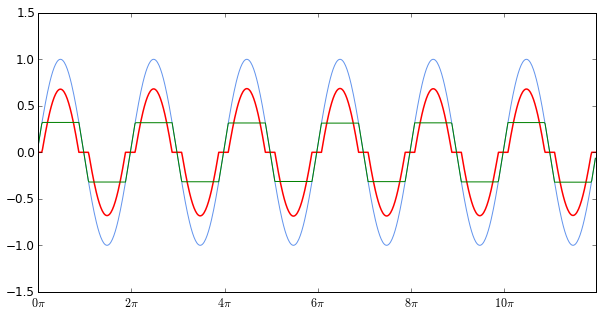

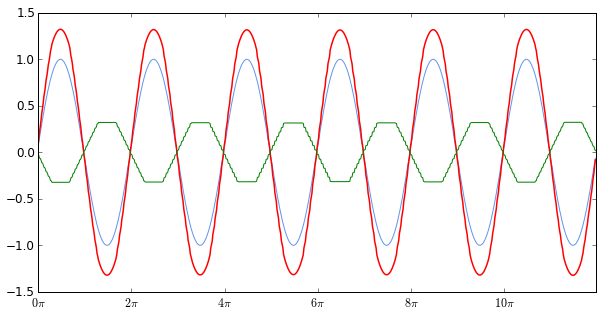

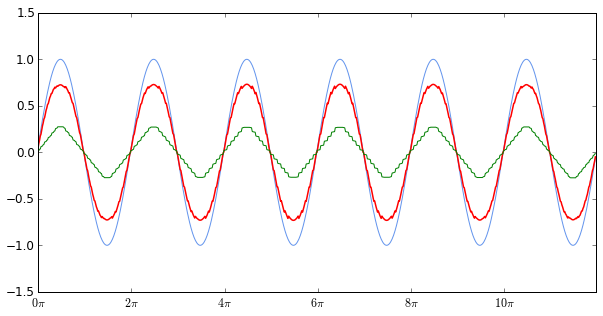

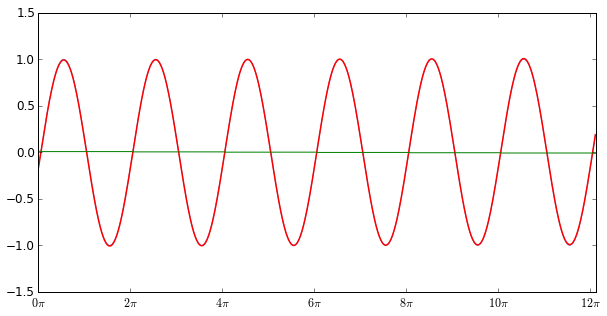

In [12]:
parameters()
plt.figure(1)
functions.medianSinPlot(16, 101, 16*128, 128*5+1, -128*5-1)
plt.savefig('Behavior with window length 101.jpg', dpi=600)

parameters()
plt.figure(2)
functions.medianSinPlot(16, 155, 16*128, 128*5+1, -128*5-1)
plt.savefig('Behavior with window length 155.jpg', dpi=600)

parameters()
plt.figure(3)
functions.medianSinPlot(16, 301, 16*128, 128*5+1, -128*5-1)
plt.savefig('Behavior with window length 301.jpg', dpi=600)

parameters()
plt.figure(4)
functions.medianSinPlot(16, 129, 16*129, 128*5+1, -128*5-1)
plt.savefig('Behavior with window length 129.jpg', dpi=600)

Here you can see, that the red wave is higher with a higher window length. When the window length gets much higher, the red wave gets smaller again. 